<a href="https://colab.research.google.com/github/Indian1999/csutortok_17/blob/main/Sz%C3%ADnes_k%C3%A9pek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
labels, counts = np.unique(y_train, return_counts=True)
print(labels)
print(counts)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


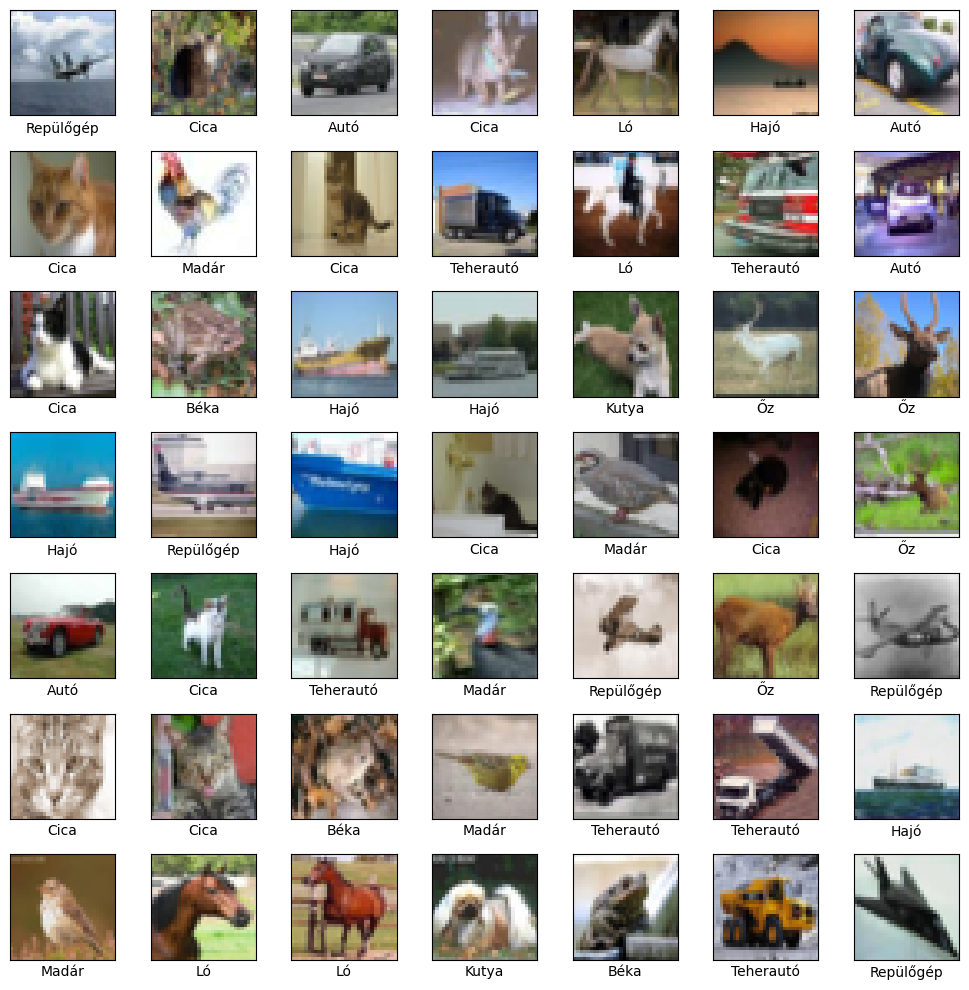

In [3]:
indeces = np.random.randint(0, len(x_train), size = 49)
images = x_train[indeces]
images_labels = y_train[indeces]
labels = ["Repülőgép", "Autó", "Madár", "Cica", "Őz", "Kutya", "Béka", "Ló", "Hajó", "Teherautó"]

plt.figure(figsize=(10, 10))
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.imshow(images[i])
    plt.xlabel(labels[images_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [4]:
y_train = y_train.reshape((-1,))
y_train = to_categorical(y_train)
y_test = y_test.reshape((-1,))
y_test = to_categorical(y_test)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation="relu")) # 32 darab 30*30 képünk lesz
model.add(MaxPooling2D((2,2))) # 15*15 képek
model.add(Conv2D(64, (3,3), activation="relu")) # 64 darab 13*13
model.add(MaxPooling2D((2,2))) # 6*6
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax")) #Kimeneti réteg
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,274 (2.48 MB)

 Trainable params: 651,274 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=30, batch_size = 128, validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8367 - loss: 0.5020 - val_accuracy: 0.7132 - val_loss: 1.0149
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8414 - loss: 0.4838 - val_accuracy: 0.7113 - val_loss: 1.0656
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8425 - loss: 0.4946 - val_accuracy: 0.7093 - val_loss: 1.0646
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8509 - loss: 0.4559 - val_accuracy: 0.7166 - val_loss: 1.0590
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8552 - loss: 0.4497 - val_accuracy: 0.7145 - val_loss: 1.0723
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8518 - loss: 0.4483 - val_accuracy: 0.7155 - val_loss: 1.0948
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8543 - loss: 0.4373 - val_accuracy: 0.7110 - val_loss: 1.1421
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8591 - loss: 0.4421 - val_accuracy: 0

In [22]:
loss, acc = model.evaluate(x_test, y_test)
print("loss_test:", loss)
print("acc_test:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7101 - loss: 1.3025
loss_test: 1.3270419836044312
acc_test: 0.7071999907493591


In [24]:
pred = model.predict(x_test[0:1])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
[[5.93797949e-06 1.28172915e-05 2.83376605e-04 9.75349247e-01
  1.08854139e-04 2.04215329e-02 3.31296399e-03 4.83864023e-05
  3.84656538e-04 7.22154655e-05]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

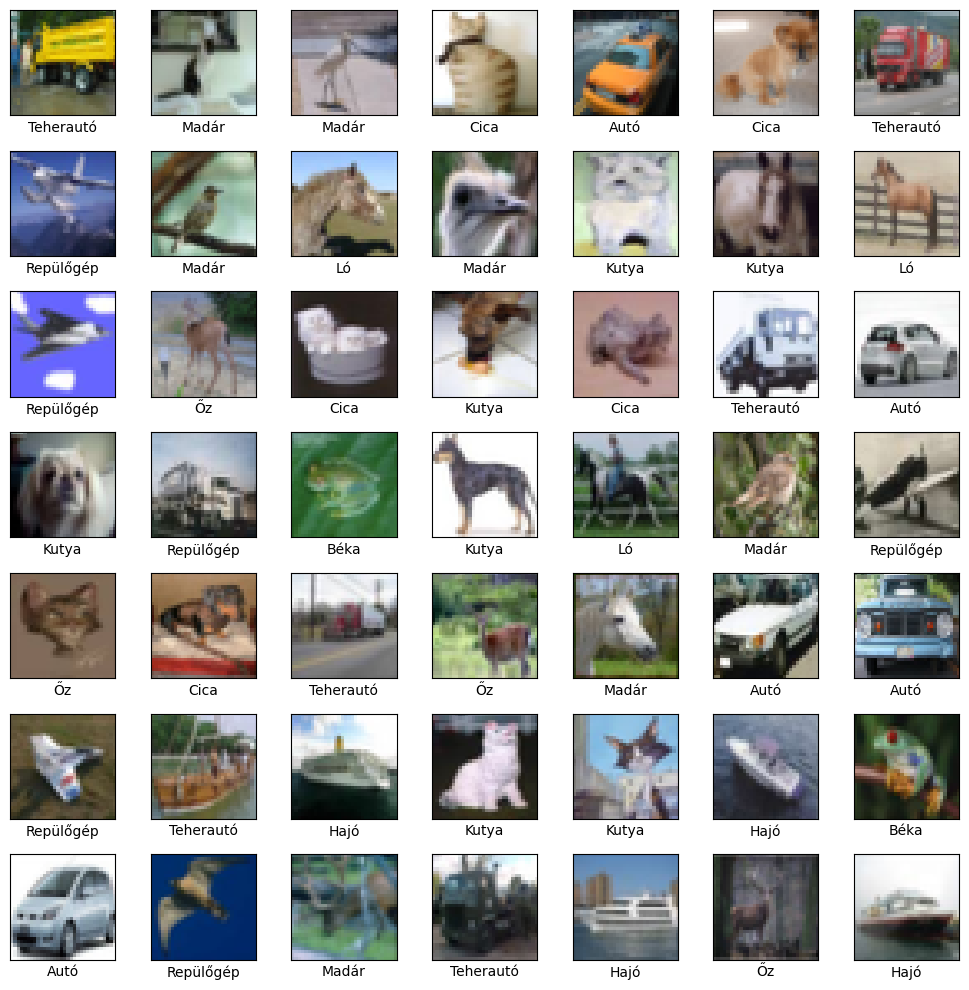

In [25]:
indeces = np.random.randint(0, len(x_test), size = 49)
images = x_test[indeces]
images_labels = y_test[indeces]

plt.figure(figsize=(10, 10))
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.imshow(images[i])
    pred = model.predict(images[i].reshape((1,32,32,3)))
    plt.xlabel(labels[np.argmax(pred)])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

Kövi órára:
* cipő
* kiskutya
* iskola
* kéz
* wc
* monitor
* ajtó
* zokni
* szék
* villamos